In [9]:
import numpy as np
import pandas as pd 
import sklearn

In [10]:
from sklearn.datasets import load_boston
df = load_boston()

In [11]:
df.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [12]:
boston = pd.DataFrame(df.data,columns=df.feature_names)
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [13]:
boston.isnull()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,False,False,False,False,False,False,False,False,False,False,False,False,False
502,False,False,False,False,False,False,False,False,False,False,False,False,False
503,False,False,False,False,False,False,False,False,False,False,False,False,False
504,False,False,False,False,False,False,False,False,False,False,False,False,False


In [14]:
boston.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

In [15]:
from sklearn.model_selection import train_test_split

X = boston.drop('NOX',axis=1)
Y = boston['NOX']
X_train,X_test,Y_train,Y_test = train_test_split(X, Y, test_size = 0.15, random_state=5)

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)


(430, 12)
(76, 12)
(430,)
(76,)


In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error




In [18]:
lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [23]:
y_train_predict = lin_model.predict(X_train)
mse = (np.sqrt(mean_squared_error(Y_train,y_train_predict)))

print("the model performance for training set")
print('RMSE is{}'.format(mse))
print("\n")

# on testing set
y_test_predict = lin_model.predict(X_test)
mse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))

print("the model performance for testing set")
print('RMSE is{}'.format(mse))
print("\n")

the model performance for training set
RMSE is0.054436900766032255


the model performance for testing set
RMSE is0.06065233299926617




Text(0, 0.5, 'Predicted')

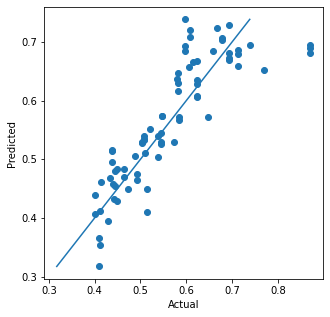

In [29]:
#Graph Representation for better understanding

import matplotlib.pyplot as plt

plt.figure(figsize=(5,5))
plt.scatter(Y_test,y_test_predict)
plt.plot([min(y_test_predict),max(y_test_predict)],[min(y_test_predict),max(y_test_predict)])
plt.xlabel('Actual')
plt.ylabel('Predicted')
